In [1]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point  #Polygon
from tqdm import tqdm
from itertools import product
import math
from matplotlib import pyplot
import math
from sklearn.metrics import mean_squared_error

In [2]:
oasi=pd.read_csv('OASI.csv')

In [3]:
oasi['oasi']=0

In [4]:
oasi

,Date,CPI_ALL,Employment,Unemployment,Crime,CPI_Housing,CPI_Food,CPI_edu,CPI_medicare,CPI_fuels,CPI_recreation,oasi
0,2013-01,238.015,56.0,10.9,167.90,282.770,239.902,142.761,406.091,287.171,102.276,0
1,2013-02,239.753,56.6,10.3,140.76,283.004,238.699,144.206,408.199,288.568,103.670,0
2,2013-03,239.995,56.5,9.8,162.33,283.613,238.345,144.189,405.563,286.947,104.036,0
3,2013-04,239.043,56.9,9.4,157.32,283.952,238.736,143.876,406.823,280.664,104.044,0
4,2013-05,239.346,57.0,9.6,166.08,284.860,238.235,143.571,405.528,286.392,103.919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,2022-10,317.014,59.9,4.5,205.99,404.703,320.025,155.490,553.630,445.079,120.946,0
118,2022-11,314.633,60.4,4.5,189.43,405.616,321.688,155.897,553.054,436.738,120.381,0
119,2022-12,312.601,60.3,4.4,201.19,407.918,321.802,155.475,548.472,455.633,120.139,0
120,2023-01,318.591,60.2,4.9,195.34,409.720,324.189,155.327,558.533,580.765,120.785,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
oasi['norm_cpi_all'] = MinMaxScaler().fit_transform(np.array(oasi['CPI_ALL']).reshape(-1,1))
oasi['norm_employment'] = MinMaxScaler().fit_transform(np.array(oasi['Employment']).reshape(-1,1))
oasi['norm_unemployment'] = MinMaxScaler().fit_transform(np.array(oasi['Unemployment']).reshape(-1,1))
oasi['norm_crime'] = MinMaxScaler().fit_transform(np.array(oasi['Crime']).reshape(-1,1))

In [7]:
oasi['oasi'] = oasi['norm_employment'] / (oasi['norm_unemployment'] + oasi['norm_cpi_all'] + oasi['norm_crime'])

In [8]:
oasi

,Date,CPI_ALL,Employment,Unemployment,Crime,CPI_Housing,CPI_Food,CPI_edu,CPI_medicare,CPI_fuels,CPI_recreation,oasi,norm_cpi_all,norm_employment,norm_unemployment,norm_crime
0,2013-01,238.015,56.0,10.9,167.90,282.770,239.902,142.761,406.091,287.171,102.276,0.647642,0.000000,0.576923,0.456376,0.434430
1,2013-02,239.753,56.6,10.3,140.76,283.004,238.699,144.206,408.199,288.568,103.670,1.234132,0.021570,0.615385,0.416107,0.060961
2,2013-03,239.995,56.5,9.8,162.33,283.613,238.345,144.189,405.563,286.947,104.036,0.796144,0.024573,0.608974,0.382550,0.357782
3,2013-04,239.043,56.9,9.4,157.32,283.952,238.736,143.876,406.823,280.664,104.044,0.965484,0.012758,0.634615,0.355705,0.288840
4,2013-05,239.346,57.0,9.6,166.08,284.860,238.235,143.571,405.528,286.392,103.919,0.806290,0.016519,0.641026,0.369128,0.409385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2022-10,317.014,59.9,4.5,205.99,404.703,320.025,155.490,553.630,445.079,120.946,0.420643,0.980428,0.826923,0.026846,0.958580
118,2022-11,314.633,60.4,4.5,189.43,405.616,321.688,155.897,553.054,436.738,120.381,0.502787,0.950879,0.858974,0.026846,0.730700
119,2022-12,312.601,60.3,4.4,201.19,407.918,321.802,155.475,548.472,455.633,120.139,0.463773,0.925660,0.852564,0.020134,0.892528
120,2023-01,318.591,60.2,4.9,195.34,409.720,324.189,155.327,558.533,580.765,120.785,0.453527,1.000000,0.846154,0.053691,0.812027


In [ ]:
# pd.DataFrame(crime_all).to_csv('crime_all.csv', encoding='utf-8', index=False)

In [9]:
from statsmodels.tsa.arima.model import ARIMA


In [128]:
oasi_arima=oasi[['Date', 'oasi']].set_index('Date')

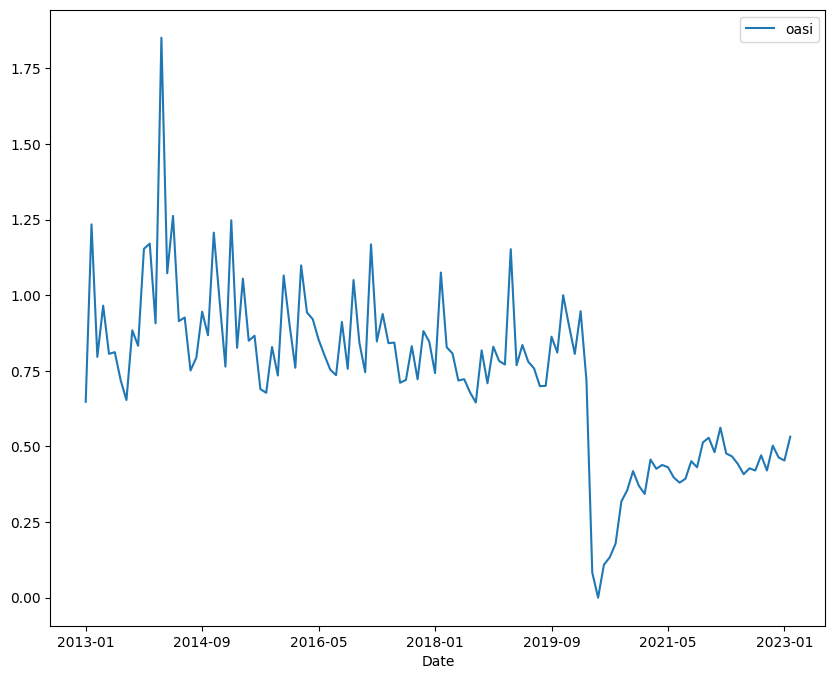

In [202]:
oasi_arima.plot(figsize=(10,8))
pyplot.show()

In [12]:
e=oasi[['Date', 'Employment']].set_index('Date')
ue=oasi[['Date', 'Unemployment']].set_index('Date')
c=oasi[['Date', 'Crime']].set_index('Date')
cp=oasi[['Date', 'CPI_ALL']].set_index('Date')

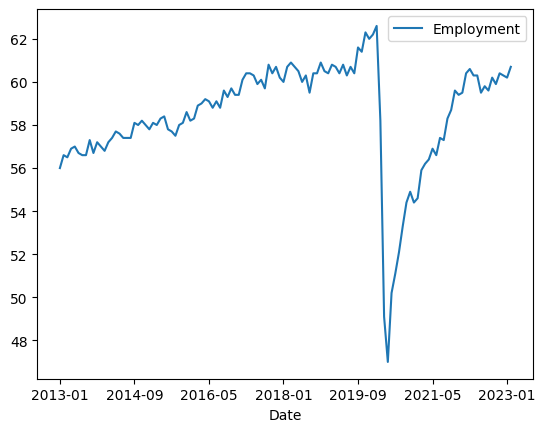

In [13]:
e.plot()
pyplot.show()

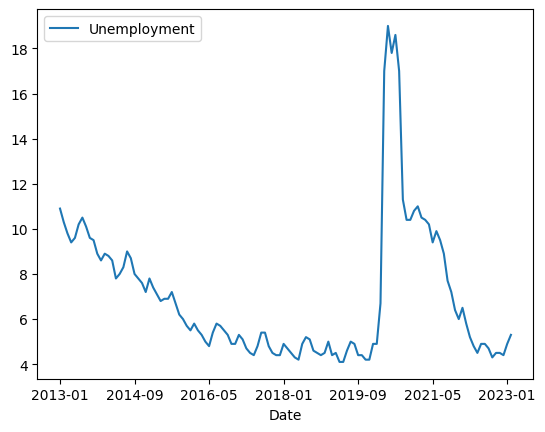

In [14]:
ue.plot()
pyplot.show()

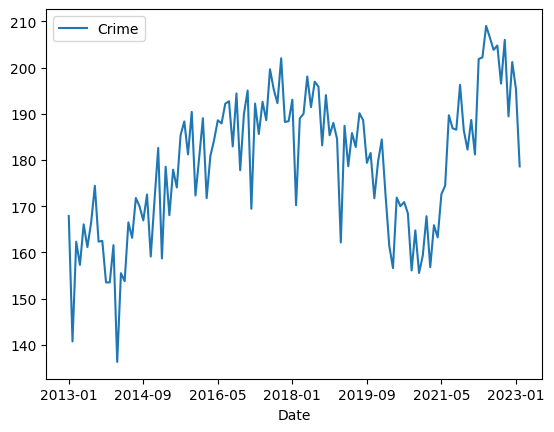

In [15]:
c.plot()
pyplot.show()

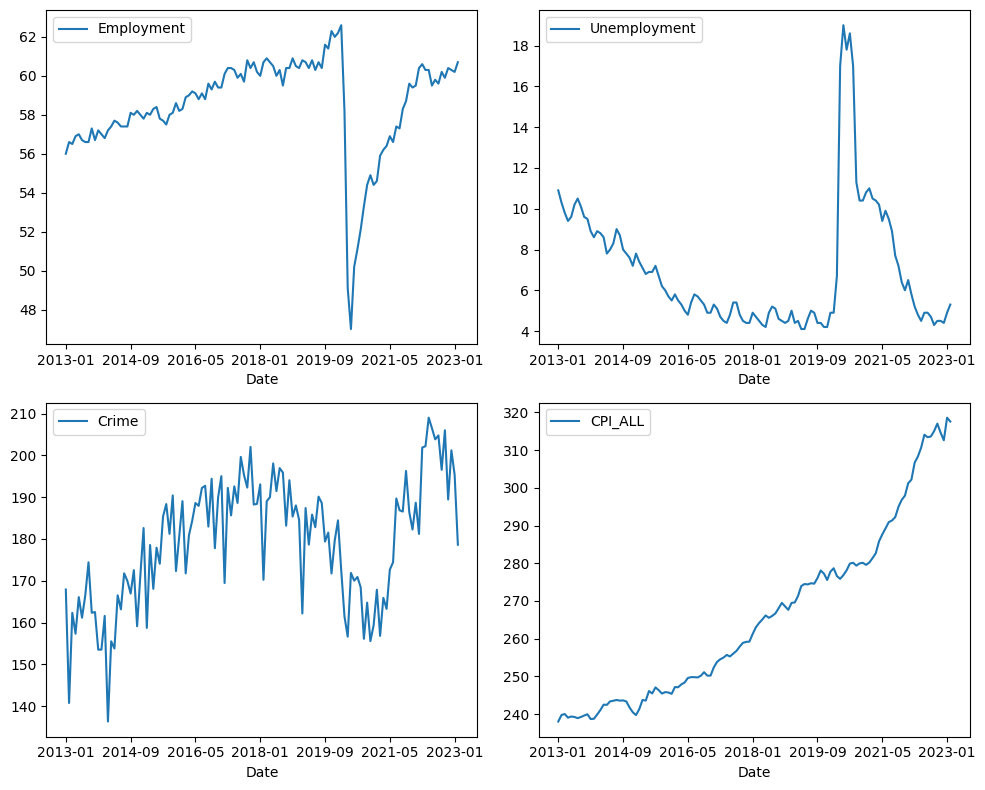

In [201]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(10,8),nrows=2, ncols=2)
e.plot(ax=ax1)
ue.plot(ax=ax2)
c.plot(ax=ax3)
cp.plot(ax=ax4)
fig.tight_layout()

In [203]:
model = ARIMA(oasi_arima, order=(6,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   oasi   No. Observations:                  122
Model:                 ARIMA(6, 1, 0)   Log Likelihood                  47.345
Date:                Mon, 24 Apr 2023   AIC                            -80.690
Time:                        10:42:08   BIC                            -61.119
Sample:                    01-01-2013   HQIC                           -72.741
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6141      0.068     -8.993      0.000      -0.748      -0.480
ar.L2         -0.0632      0.141     -0.446      0.655      -0.340       0.214
ar.L3          0.1291      0.107      1.208      0.2

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.824400, expected=1.152137
predicted=1.646329, expected=0.768536
predicted=0.849807, expected=0.835356


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.728541, expected=0.780288
predicted=1.193522, expected=0.758189
predicted=1.129165, expected=0.699398


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.730443, expected=0.700359
predicted=0.742020, expected=0.862875
predicted=0.790976, expected=0.810316
predicted=0.758334, expected=0.999991


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.104891, expected=0.899610
predicted=1.109089, expected=0.805972
predicted=0.802434, expected=0.947136
predicted=0.963612, expected=0.718346
predicted=0.732622, expected=0.083368
predicted=-0.148096, expected=0.000000
predicted=0.149318, expected=0.109064


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.820005, expected=0.133501
predicted=0.601391, expected=0.178607
predicted=0.616107, expected=0.318339


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.302419, expected=0.355437
predicted=0.384411, expected=0.418554
predicted=0.570973, expected=0.370043


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.324948, expected=0.343060
predicted=0.216355, expected=0.456678
predicted=0.382299, expected=0.426223
predicted=0.410716, expected=0.438785
predicted=0.570524, expected=0.431420


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.539573, expected=0.397276
predicted=0.457606, expected=0.380350
predicted=0.393968, expected=0.393199


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.424910, expected=0.451240
predicted=0.517657, expected=0.431164


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.406078, expected=0.513402
predicted=0.527322, expected=0.528879
predicted=0.562881, expected=0.481119


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.532898, expected=0.562276
predicted=0.593922, expected=0.477016
predicted=0.475308, expected=0.467046


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.522214, expected=0.442137
predicted=0.508278, expected=0.408178
predicted=0.492753, expected=0.427758
predicted=0.394600, expected=0.420655
predicted=0.397959, expected=0.470695
predicted=0.484925, expected=0.420643
predicted=0.457603, expected=0.502787


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.422044, expected=0.463773
predicted=0.504908, expected=0.453527
predicted=0.497033, expected=0.532302
Test RMSE: 0.246


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

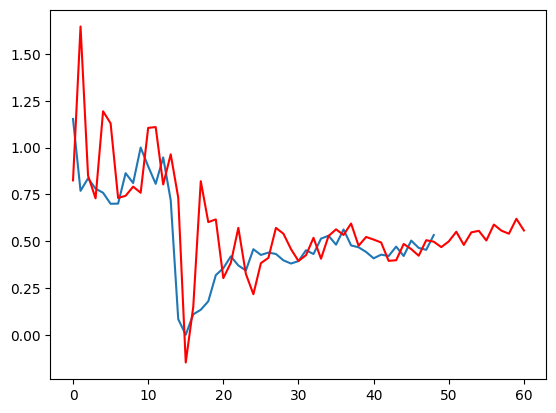

In [204]:
X = oasi_arima.values
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history[-6:], order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

for t in range(12):
    model = ARIMA(history[-6:], order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(np.array([yhat]))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

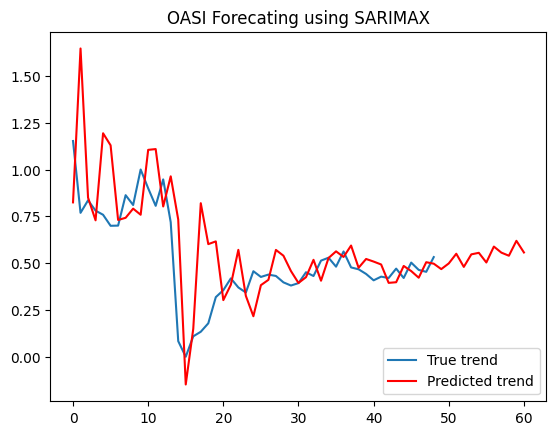

In [205]:
pyplot.plot(test, label='True trend')
pyplot.plot(predictions, color='red', label='Predicted trend')
pyplot.legend(loc="lower right")
pyplot.title('OASI Forecating using SARIMAX')
pyplot.show()

In [206]:
test_date=list(oasi.iloc[73:]['Date'])

In [207]:
pred_date=test_date + ['2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10','2023-11',
                 '2023-12','2024-01','2024-02']

In [208]:
true=pd.DataFrame(test, columns=['true_oasi'])
true['date'] =test_date
#true=true.set_index('date')

In [209]:
pred=pd.DataFrame(predictions, columns=['pred_oasi'])
pred['date'] =pred_date
#pred=pred.set_index('date')

In [213]:
arima_stats=pred

In [214]:
arima_stats['true_oasi']=true['true_oasi']

In [216]:
arima_stats.to_csv('arima_stats.csv', encoding='utf-8', index=False)

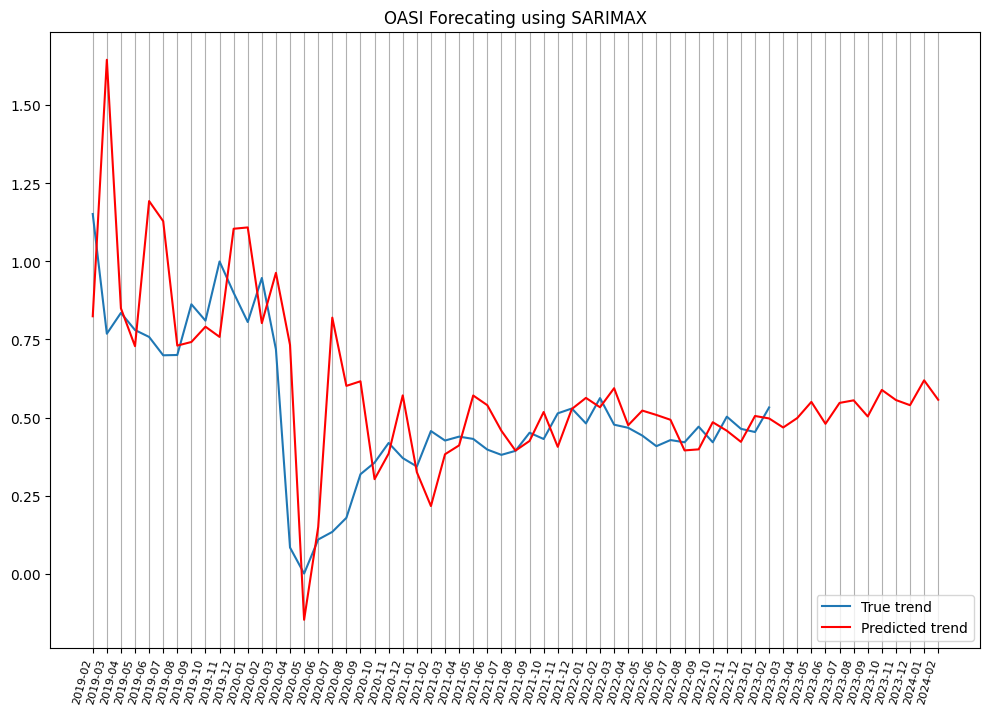

In [210]:
fig, ax = plt.subplots(figsize = (12,8))
ax.xaxis.grid()
plt.plot(true['date'], true['true_oasi'], label='True trend')
plt.plot(pred['date'], pred['pred_oasi'], color='red', label='Predicted trend')
plt.setp(ax.get_xticklabels(), rotation = 75, 
         ha = 'right', fontsize = 8, 
         color = 'black')
plt.legend(loc="lower right")
plt.title('OASI Forecating using SARIMAX')
plt.show()

In [217]:
oasi_tree=oasi[['Date', 'oasi']].set_index('Date')

In [152]:
# xgboost
import xgboost
print("xgboost", xgboost.__version__)

xgboost 1.7.0


>expected= 1.1521374287882715 predicted= 0.8401507
>expected= 0.7685360088920945 predicted= 0.9198889
>expected= 0.8353563102934543 predicted= 0.9101163
>expected= 0.7802883959637874 predicted= 0.85385597
>expected= 0.7581894011277023 predicted= 0.8413164
>expected= 0.699397706007743 predicted= 0.8736368
>expected= 0.7003586943898112 predicted= 0.7003252
>expected= 0.8628751512117018 predicted= 0.72046435
>expected= 0.8103159414762732 predicted= 0.80924404
>expected= 0.9999913536228383 predicted= 1.0710108
>expected= 0.8996100332290046 predicted= 0.96386397
>expected= 0.8059720035235467 predicted= 0.75105035
>expected= 0.9471364280759805 predicted= 0.80098176
>expected= 0.718345638466313 predicted= 0.8999339
>expected= 0.08336811228639307 predicted= 1.0735891
>expected= 0.0 predicted= 0.8555378
>expected= 0.10906393477811299 predicted= 0.025601508
>expected= 0.13350129571385191 predicted= 0.124769166
>expected= 0.17860667055957355 predicted= 0.11252837
>expected= 0.3183391855157718 pre

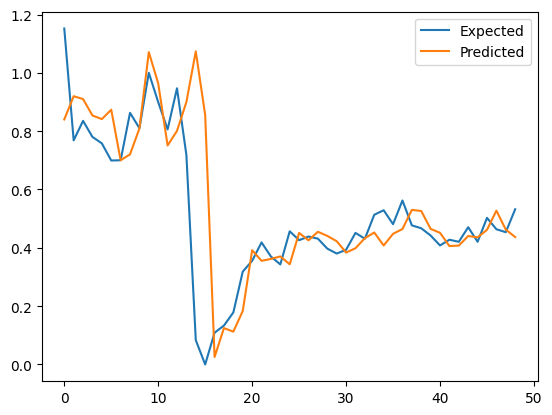

In [218]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    
    return yhat[0]

# load the dataset
series = oasi_tree
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
#mse, y, yhat = walk_forward_validation(data, 49)
predictions = list()
# split dataset
train, test = train_test_split(data, 49)
# seed history with training dataset
history = [x for x in train]
# step over each time-step in the test set
for i in range(len(test)):
    # split test row into input and output columns
    testX, testy = test[i, :-1], test[i, -1]
    # fit model on history and make a prediction
    yhat = xgboost_forecast(history, testX)
    # store forecast in list of predictions
    predictions.append(yhat)
    # add actual observation to history for the next loop
    history.append(test[i])
    # summarize progress
    print('>expected=' , testy, 'predicted=',yhat)
    # estimate prediction error
#mse = mean_squared_error(test[:, -1], predictions)
rmse = math.sqrt(mean_squared_error(test[:, -1], predictions))
y=test[:, -1]
yhat = predictions

print('Test RMSE: %.3f' % rmse)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [220]:
last_true=np.array(list(oasi_tree.iloc[-6:]['oasi']))

In [221]:
future_1year=[]
for i in range(12):
    p = xgboost_forecast(history, last_true)
    future_1year.append(p)
    n_his = np.append(last_true, [p])
    history.append(n_his)
    last_true = np.append(last_true[1:], [p])

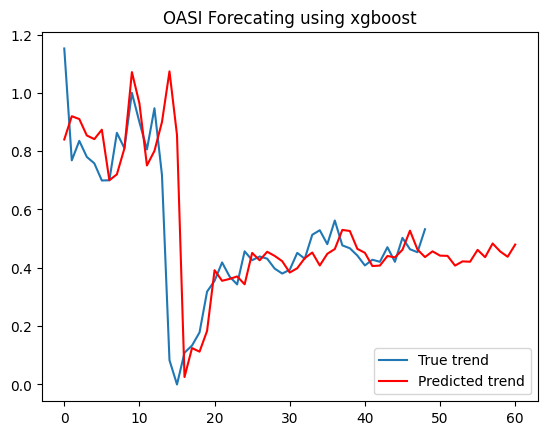

In [222]:
pyplot.plot(y, label='True trend')
pyplot.plot(yhat+future_1year, color='red', label='Predicted trend')
pyplot.legend(loc="lower right")
pyplot.title('OASI Forecating using xgboost')
pyplot.show()

In [223]:
true=pd.DataFrame(y, columns=['true_oasi'])
true['date'] =test_date
#true=true.set_index('date')

In [224]:
pred=pd.DataFrame(yhat+future_1year, columns=['pred_oasi'])
pred['date'] =pred_date
#pred=pred.set_index('date')

In [225]:
pred['pred_oasi']

0     0.840151
1     0.919889
2     0.910116
3     0.853856
4     0.841316
        ...   
56    0.436457
57    0.483422
58    0.456241
59    0.437924
60    0.479738
Name: pred_oasi, Length: 61, dtype: float32

In [226]:
xgboost_stats=pred
xgboost_stats['true_oasi']=true['true_oasi']
xgboost_stats.to_csv('xgboost_stats.csv', encoding='utf-8', index=False)

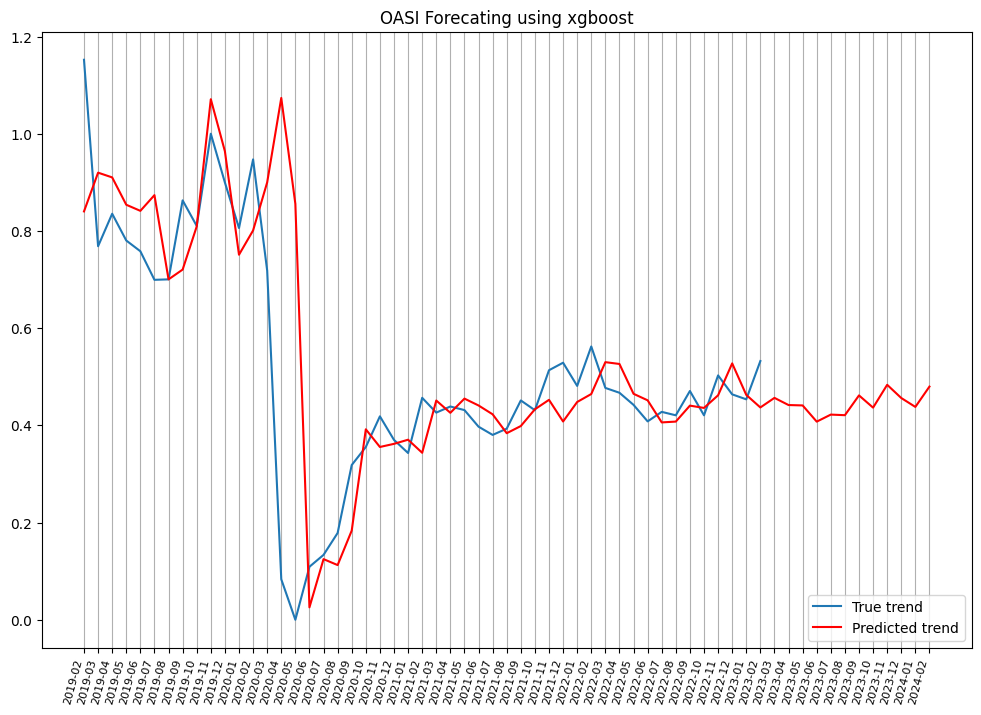

In [227]:
fig, ax = plt.subplots(figsize = (12,8))
ax.xaxis.grid()
plt.plot(true['date'], true['true_oasi'], label='True trend')
plt.plot(pred['date'], pred['pred_oasi'], color='red', label='Predicted trend')
plt.setp(ax.get_xticklabels(), rotation = 75, 
         ha = 'right', fontsize = 8, 
         color = 'black')
plt.legend(loc="lower right")
plt.title('OASI Forecating using xgboost')
plt.show()

In [228]:

# univariate bidirectional lstm example
from numpy import array
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, InputLayer, BatchNormalization, LeakyReLU, Normalization, SpatialDropout1D

In [229]:
train = asarray(train)
# split into input and output columns
X_train, y_train = train[:, :-1], train[:, -1]

In [230]:
test = asarray(test)
# split into input and output columns
X_test, y_test = test[:, :-1], test[:, -1]

In [61]:
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [62]:
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [254]:
model = Sequential([
    tf.keras.Input(shape=(6, 1)),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    Dense(1, activation='linear')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=opt,metrics=['mae'])
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (None, 6, 64)             16896     
                                                                 
 dropout_100 (Dropout)       (None, 6, 64)             0         
                                                                 
 lstm_48 (LSTM)              (None, 6, 64)             33024     
                                                                 
 dropout_101 (Dropout)       (None, 6, 64)             0         
                                                                 
 lstm_49 (LSTM)              (None, 6, 64)             33024     
                                                                 
 dropout_102 (Dropout)       (None, 6, 64)             0         
                                                                 
 dense_98 (Dense)            (None, 6, 1)            

In [255]:
# simple early stopping, if needed, for now validation loss is not increasing just not decreasing so we do not need early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [256]:
# fit an xgboost model and make a one step prediction
def lstm_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # set seed
    np.random.seed(2023)
    # Fit model 
    history = model.fit(trainX, trainy, validation_split=0.2, epochs=100, batch_size=64, verbose=2, callbacks=[es])
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    
    return yhat[0]

# load the dataset
series = oasi_tree
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
#mse, y, yhat = walk_forward_validation(data, 49)
predictions = list()
# split dataset
train, test = train_test_split(data, 49)
# seed history with training dataset
history = [x for x in train]
# step over each time-step in the test set
for i in range(len(test)):
    # split test row into input and output columns
    testX, testy = test[i, :-1], test[i, -1]
    # fit model on history and make a prediction
    yhat = lstm_forecast(history, testX)
    # store forecast in list of predictions
    predictions.append(yhat)
    # add actual observation to history for the next loop
    history.append(test[i])
    # summarize progress
    print('>expected=' , testy, 'predicted=',yhat)
    # estimate prediction error
#mse = mean_squared_error(test[:, -1], predictions)
rmse = math.sqrt(mean_squared_error(test[:, -1], predictions))
y=test[:, -1]
yhat = predictions

print('Test RMSE: %.3f' % rmse)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

Epoch 1/100


2023-04-24 10:54:47.535845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-24 10:54:56.727369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 - 13s - loss: 0.8624 - mae: 0.9067 - val_loss: 0.6142 - val_mae: 0.7773 - 13s/epoch - 13s/step
Epoch 2/100
1/1 - 2s - loss: 0.8511 - mae: 0.9004 - val_loss: 0.6047 - val_mae: 0.7711 - 2s/epoch - 2s/step
Epoch 3/100
1/1 - 1s - loss: 0.8396 - mae: 0.8940 - val_loss: 0.5953 - val_mae: 0.7650 - 1s/epoch - 1s/step
Epoch 4/100
1/1 - 1s - loss: 0.8281 - mae: 0.8875 - val_loss: 0.5857 - val_mae: 0.7587 - 1s/epoch - 1s/step
Epoch 5/100
1/1 - 1s - loss: 0.8162 - mae: 0.8807 - val_loss: 0.5755 - val_mae: 0.7519 - 933ms/epoch - 933ms/step
Epoch 6/100
1/1 - 1s - loss: 0.8039 - mae: 0.8737 - val_loss: 0.5647 - val_mae: 0.7446 - 1s/epoch - 1s/step
Epoch 7/100
1/1 - 1s - loss: 0.7907 - mae: 0.8660 - val_loss: 0.5531 - val_mae: 0.7367 - 998ms/epoch - 998ms/step
Epoch 8/100
1/1 - 1s - loss: 0.7766 - mae: 0.8578 - val_loss: 0.5405 - val_mae: 0.7280 - 778ms/epoch - 778ms/step
Epoch 9/100
1/1 - 1s - loss: 0.7614 - mae: 0.8487 - val_loss: 0.5268 - val_mae: 0.7183 - 960ms/epoch - 960ms/step
Epoch 10/100


Epoch 73/100
1/1 - 1s - loss: 0.2068 - mae: 0.3653 - val_loss: 0.1217 - val_mae: 0.2913 - 713ms/epoch - 713ms/step
Epoch 74/100
1/1 - 1s - loss: 0.2044 - mae: 0.3632 - val_loss: 0.1205 - val_mae: 0.2900 - 516ms/epoch - 516ms/step
Epoch 75/100
1/1 - 1s - loss: 0.2030 - mae: 0.3615 - val_loss: 0.1194 - val_mae: 0.2888 - 711ms/epoch - 711ms/step
Epoch 76/100
1/1 - 1s - loss: 0.2002 - mae: 0.3590 - val_loss: 0.1183 - val_mae: 0.2877 - 573ms/epoch - 573ms/step
Epoch 77/100
1/1 - 0s - loss: 0.1983 - mae: 0.3571 - val_loss: 0.1172 - val_mae: 0.2865 - 483ms/epoch - 483ms/step
Epoch 78/100
1/1 - 1s - loss: 0.1959 - mae: 0.3546 - val_loss: 0.1161 - val_mae: 0.2853 - 504ms/epoch - 504ms/step
Epoch 79/100
1/1 - 0s - loss: 0.1942 - mae: 0.3528 - val_loss: 0.1150 - val_mae: 0.2841 - 492ms/epoch - 492ms/step
Epoch 80/100
1/1 - 1s - loss: 0.1920 - mae: 0.3506 - val_loss: 0.1139 - val_mae: 0.2828 - 533ms/epoch - 533ms/step
Epoch 81/100
1/1 - 1s - loss: 0.1896 - mae: 0.3479 - val_loss: 0.1128 - val_mae:

2023-04-24 10:55:55.658258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
>expected= 1.1521374287882715 predicted= [[0.26976487]
 [0.48119044]
 [0.67113847]
 [0.8265479 ]
 [0.9431582 ]
 [1.0250247 ]]
Epoch 1/100
1/1 - 11s - loss: 0.1497 - mae: 0.3005 - val_loss: 0.0969 - val_mae: 0.2540 - 11s/epoch - 11s/step
Epoch 2/100
1/1 - 3s - loss: 0.1480 - mae: 0.2984 - val_loss: 0.0956 - val_mae: 0.2523 - 3s/epoch - 3s/step
Epoch 3/100
1/1 - 3s - loss: 0.1464 - mae: 0.2964 - val_loss: 0.0943 - val_mae: 0.2506 - 3s/epoch - 3s/step
Epoch 4/100
1/1 - 3s - loss: 0.1442 - mae: 0.2936 - val_loss: 0.0929 - val_mae: 0.2489 - 3s/epoch - 3s/step
Epoch 5/100
1/1 - 2s - loss: 0.1421 - mae: 0.2908 - val_loss: 0.0915 - val_mae: 0.2470 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 0.1404 - mae: 0.2890 - val_loss: 0.0901 - val_mae: 0.2451 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 0.1389 - mae: 0.2873 - val_loss: 0.0887 - val_mae: 0.2431 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - loss: 0.1368 - mae: 0.2842 - val_loss: 0.0

Epoch 75/100
1/1 - 2s - loss: 0.0718 - mae: 0.1975 - val_loss: 0.0394 - val_mae: 0.1692 - 2s/epoch - 2s/step
Epoch 76/100
1/1 - 2s - loss: 0.0710 - mae: 0.1963 - val_loss: 0.0390 - val_mae: 0.1685 - 2s/epoch - 2s/step
Epoch 77/100
1/1 - 2s - loss: 0.0708 - mae: 0.1960 - val_loss: 0.0386 - val_mae: 0.1678 - 2s/epoch - 2s/step
Epoch 78/100
1/1 - 2s - loss: 0.0700 - mae: 0.1946 - val_loss: 0.0382 - val_mae: 0.1671 - 2s/epoch - 2s/step
Epoch 79/100
1/1 - 2s - loss: 0.0697 - mae: 0.1939 - val_loss: 0.0378 - val_mae: 0.1665 - 2s/epoch - 2s/step
Epoch 80/100
1/1 - 2s - loss: 0.0693 - mae: 0.1932 - val_loss: 0.0375 - val_mae: 0.1659 - 2s/epoch - 2s/step
Epoch 81/100
1/1 - 2s - loss: 0.0685 - mae: 0.1922 - val_loss: 0.0371 - val_mae: 0.1655 - 2s/epoch - 2s/step
Epoch 82/100
1/1 - 2s - loss: 0.0683 - mae: 0.1921 - val_loss: 0.0368 - val_mae: 0.1651 - 2s/epoch - 2s/step
Epoch 83/100
1/1 - 2s - loss: 0.0678 - mae: 0.1914 - val_loss: 0.0365 - val_mae: 0.1647 - 2s/epoch - 2s/step
Epoch 84/100
1/1 - 

Epoch 47/100
1/1 - 0s - loss: 0.0490 - mae: 0.1583 - val_loss: 0.0236 - val_mae: 0.1317 - 316ms/epoch - 316ms/step
Epoch 48/100
1/1 - 0s - loss: 0.0492 - mae: 0.1584 - val_loss: 0.0236 - val_mae: 0.1317 - 313ms/epoch - 313ms/step
Epoch 49/100
1/1 - 0s - loss: 0.0488 - mae: 0.1581 - val_loss: 0.0235 - val_mae: 0.1315 - 312ms/epoch - 312ms/step
Epoch 50/100
1/1 - 0s - loss: 0.0488 - mae: 0.1577 - val_loss: 0.0234 - val_mae: 0.1312 - 337ms/epoch - 337ms/step
Epoch 51/100
1/1 - 0s - loss: 0.0486 - mae: 0.1576 - val_loss: 0.0234 - val_mae: 0.1310 - 417ms/epoch - 417ms/step
Epoch 52/100
1/1 - 0s - loss: 0.0489 - mae: 0.1578 - val_loss: 0.0233 - val_mae: 0.1308 - 336ms/epoch - 336ms/step
Epoch 53/100
1/1 - 0s - loss: 0.0485 - mae: 0.1578 - val_loss: 0.0233 - val_mae: 0.1306 - 347ms/epoch - 347ms/step
Epoch 54/100
1/1 - 0s - loss: 0.0483 - mae: 0.1571 - val_loss: 0.0232 - val_mae: 0.1304 - 315ms/epoch - 315ms/step
Epoch 55/100
1/1 - 0s - loss: 0.0482 - mae: 0.1567 - val_loss: 0.0232 - val_mae:

Epoch 16: early stopping
1/1 [==============================] - 0s 259ms/step
>expected= 0.699397706007743 predicted= [[0.8298233 ]
 [0.8792191 ]
 [0.89561224]
 [0.8957759 ]
 [0.89045656]
 [0.8846315 ]]
Epoch 1/100
1/1 - 7s - loss: 0.0447 - mae: 0.1519 - val_loss: 0.0227 - val_mae: 0.1337 - 7s/epoch - 7s/step
Epoch 2/100
1/1 - 1s - loss: 0.0445 - mae: 0.1513 - val_loss: 0.0226 - val_mae: 0.1334 - 1s/epoch - 1s/step
Epoch 3/100
1/1 - 1s - loss: 0.0449 - mae: 0.1521 - val_loss: 0.0225 - val_mae: 0.1330 - 1s/epoch - 1s/step
Epoch 4/100
1/1 - 1s - loss: 0.0444 - mae: 0.1511 - val_loss: 0.0225 - val_mae: 0.1329 - 882ms/epoch - 882ms/step
Epoch 5/100
1/1 - 1s - loss: 0.0447 - mae: 0.1516 - val_loss: 0.0225 - val_mae: 0.1329 - 520ms/epoch - 520ms/step
Epoch 6/100
1/1 - 1s - loss: 0.0447 - mae: 0.1515 - val_loss: 0.0225 - val_mae: 0.1330 - 787ms/epoch - 787ms/step
Epoch 7/100
1/1 - 1s - loss: 0.0448 - mae: 0.1517 - val_loss: 0.0224 - val_mae: 0.1328 - 743ms/epoch - 743ms/step
Epoch 8/100
1/1 -

Epoch 71/100
1/1 - 0s - loss: 0.0419 - mae: 0.1463 - val_loss: 0.0201 - val_mae: 0.1220 - 307ms/epoch - 307ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0418 - mae: 0.1458 - val_loss: 0.0189 - val_mae: 0.1158 - 251ms/epoch - 251ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0418 - mae: 0.1439 - val_loss: 0.0196 - val_mae: 0.1194 - 297ms/epoch - 297ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0416 - mae: 0.1449 - val_loss: 0.0200 - val_mae: 0.1218 - 338ms/epoch - 338ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0420 - mae: 0.1467 - val_loss: 0.0193 - val_mae: 0.1178 - 297ms/epoch - 297ms/step
Epoch 76/100
1/1 - 0s - loss: 0.0419 - mae: 0.1448 - val_loss: 0.0190 - val_mae: 0.1162 - 254ms/epoch - 254ms/step
Epoch 77/100
1/1 - 0s - loss: 0.0417 - mae: 0.1440 - val_loss: 0.0198 - val_mae: 0.1205 - 229ms/epoch - 229ms/step
Epoch 78/100
1/1 - 0s - loss: 0.0420 - mae: 0.1461 - val_loss: 0.0198 - val_mae: 0.1203 - 289ms/epoch - 289ms/step
Epoch 79/100
1/1 - 0s - loss: 0.0417 - mae: 0.1454 - val_loss: 0.0193 - val_mae:

Epoch 32/100
1/1 - 2s - loss: 0.0400 - mae: 0.1415 - val_loss: 0.0169 - val_mae: 0.1015 - 2s/epoch - 2s/step
Epoch 33/100
1/1 - 2s - loss: 0.0400 - mae: 0.1413 - val_loss: 0.0171 - val_mae: 0.1029 - 2s/epoch - 2s/step
Epoch 34/100
1/1 - 2s - loss: 0.0400 - mae: 0.1420 - val_loss: 0.0170 - val_mae: 0.1025 - 2s/epoch - 2s/step
Epoch 35/100
1/1 - 2s - loss: 0.0401 - mae: 0.1423 - val_loss: 0.0167 - val_mae: 0.1004 - 2s/epoch - 2s/step
Epoch 36/100
1/1 - 2s - loss: 0.0400 - mae: 0.1413 - val_loss: 0.0166 - val_mae: 0.0997 - 2s/epoch - 2s/step
Epoch 37/100
1/1 - 2s - loss: 0.0400 - mae: 0.1413 - val_loss: 0.0167 - val_mae: 0.1004 - 2s/epoch - 2s/step
Epoch 38/100
1/1 - 2s - loss: 0.0400 - mae: 0.1414 - val_loss: 0.0169 - val_mae: 0.1018 - 2s/epoch - 2s/step
Epoch 38: early stopping
1/1 [==============================] - 0s 107ms/step
>expected= 0.8103159414762732 predicted= [[0.8573021 ]
 [0.8640967 ]
 [0.8687491 ]
 [0.8436505 ]
 [0.82224214]
 [0.79583013]]
Epoch 1/100
1/1 - 6s - loss: 0.04

Epoch 13: early stopping
1/1 [==============================] - 0s 195ms/step
>expected= 0.9471364280759805 predicted= [[0.84659076]
 [0.85209876]
 [0.8444816 ]
 [0.8069899 ]
 [0.78450686]
 [0.76559025]]
Epoch 1/100
1/1 - 9s - loss: 0.0393 - mae: 0.1404 - val_loss: 0.0141 - val_mae: 0.0852 - 9s/epoch - 9s/step
Epoch 2/100
1/1 - 5s - loss: 0.0393 - mae: 0.1399 - val_loss: 0.0139 - val_mae: 0.0846 - 5s/epoch - 5s/step
Epoch 3/100
1/1 - 5s - loss: 0.0393 - mae: 0.1403 - val_loss: 0.0138 - val_mae: 0.0843 - 5s/epoch - 5s/step
Epoch 4/100
1/1 - 3s - loss: 0.0393 - mae: 0.1404 - val_loss: 0.0139 - val_mae: 0.0845 - 3s/epoch - 3s/step
Epoch 5/100
1/1 - 3s - loss: 0.0393 - mae: 0.1401 - val_loss: 0.0140 - val_mae: 0.0848 - 3s/epoch - 3s/step
Epoch 6/100
1/1 - 4s - loss: 0.0393 - mae: 0.1399 - val_loss: 0.0140 - val_mae: 0.0850 - 4s/epoch - 4s/step
Epoch 7/100
1/1 - 3s - loss: 0.0393 - mae: 0.1401 - val_loss: 0.0140 - val_mae: 0.0851 - 3s/epoch - 3s/step
Epoch 8/100
1/1 - 3s - loss: 0.0393 - ma

Epoch 11/100
2/2 - 3s - loss: 0.0382 - mae: 0.1347 - val_loss: 0.1099 - val_mae: 0.2094 - 3s/epoch - 1s/step
Epoch 12/100
2/2 - 3s - loss: 0.0396 - mae: 0.1329 - val_loss: 0.1078 - val_mae: 0.2095 - 3s/epoch - 1s/step
Epoch 13/100
2/2 - 2s - loss: 0.0410 - mae: 0.1334 - val_loss: 0.1086 - val_mae: 0.2091 - 2s/epoch - 1s/step
Epoch 14/100
2/2 - 2s - loss: 0.0401 - mae: 0.1324 - val_loss: 0.1107 - val_mae: 0.2091 - 2s/epoch - 1s/step
Epoch 15/100
2/2 - 2s - loss: 0.0392 - mae: 0.1327 - val_loss: 0.1130 - val_mae: 0.2102 - 2s/epoch - 1s/step
Epoch 16/100
2/2 - 2s - loss: 0.0384 - mae: 0.1336 - val_loss: 0.1157 - val_mae: 0.2126 - 2s/epoch - 1s/step
Epoch 17/100
2/2 - 2s - loss: 0.0382 - mae: 0.1368 - val_loss: 0.1172 - val_mae: 0.2143 - 2s/epoch - 1s/step
Epoch 18/100
2/2 - 2s - loss: 0.0382 - mae: 0.1380 - val_loss: 0.1189 - val_mae: 0.2162 - 2s/epoch - 1s/step
Epoch 19/100
2/2 - 2s - loss: 0.0385 - mae: 0.1406 - val_loss: 0.1225 - val_mae: 0.2211 - 2s/epoch - 1s/step
Epoch 20/100
2/2 - 

Epoch 10/100
2/2 - 3s - loss: 0.0383 - mae: 0.1358 - val_loss: 0.1689 - val_mae: 0.2836 - 3s/epoch - 1s/step
Epoch 11/100
2/2 - 3s - loss: 0.0381 - mae: 0.1387 - val_loss: 0.1729 - val_mae: 0.2874 - 3s/epoch - 1s/step
Epoch 12/100
2/2 - 3s - loss: 0.0381 - mae: 0.1411 - val_loss: 0.1732 - val_mae: 0.2877 - 3s/epoch - 1s/step
Epoch 13/100
2/2 - 3s - loss: 0.0381 - mae: 0.1414 - val_loss: 0.1698 - val_mae: 0.2844 - 3s/epoch - 1s/step
Epoch 14/100
2/2 - 3s - loss: 0.0381 - mae: 0.1394 - val_loss: 0.1653 - val_mae: 0.2805 - 3s/epoch - 1s/step
Epoch 15/100
2/2 - 2s - loss: 0.0380 - mae: 0.1361 - val_loss: 0.1614 - val_mae: 0.2774 - 2s/epoch - 1s/step
Epoch 16/100
2/2 - 2s - loss: 0.0384 - mae: 0.1348 - val_loss: 0.1584 - val_mae: 0.2751 - 2s/epoch - 1s/step
Epoch 17/100
2/2 - 2s - loss: 0.0389 - mae: 0.1346 - val_loss: 0.1587 - val_mae: 0.2754 - 2s/epoch - 1s/step
Epoch 18/100
2/2 - 2s - loss: 0.0386 - mae: 0.1337 - val_loss: 0.1615 - val_mae: 0.2775 - 2s/epoch - 1s/step
Epoch 19/100
2/2 - 

2/2 - 4s - loss: 0.0367 - mae: 0.1364 - val_loss: 0.2039 - val_mae: 0.3582 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 3s - loss: 0.0367 - mae: 0.1347 - val_loss: 0.1996 - val_mae: 0.3547 - 3s/epoch - 1s/step
Epoch 3/100
2/2 - 3s - loss: 0.0371 - mae: 0.1336 - val_loss: 0.2002 - val_mae: 0.3552 - 3s/epoch - 1s/step
Epoch 4/100
2/2 - 3s - loss: 0.0368 - mae: 0.1332 - val_loss: 0.2054 - val_mae: 0.3596 - 3s/epoch - 1s/step
Epoch 5/100
2/2 - 3s - loss: 0.0367 - mae: 0.1354 - val_loss: 0.2073 - val_mae: 0.3612 - 3s/epoch - 1s/step
Epoch 6/100
2/2 - 2s - loss: 0.0367 - mae: 0.1364 - val_loss: 0.2071 - val_mae: 0.3610 - 2s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.0367 - mae: 0.1361 - val_loss: 0.2092 - val_mae: 0.3628 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 3s - loss: 0.0367 - mae: 0.1370 - val_loss: 0.2118 - val_mae: 0.3650 - 3s/epoch - 1s/step
Epoch 9/100
2/2 - 3s - loss: 0.0369 - mae: 0.1383 - val_loss: 0.2152 - val_mae: 0.3679 - 3s/epoch - 1s/step
Epoch 10/100
2/2 - 3s - loss: 0.0370 - m

Epoch 12/100
2/2 - 3s - loss: 0.0360 - mae: 0.1336 - val_loss: 0.2278 - val_mae: 0.4053 - 3s/epoch - 2s/step
Epoch 13/100
2/2 - 3s - loss: 0.0360 - mae: 0.1337 - val_loss: 0.2289 - val_mae: 0.4063 - 3s/epoch - 2s/step
Epoch 14/100
2/2 - 3s - loss: 0.0360 - mae: 0.1343 - val_loss: 0.2314 - val_mae: 0.4084 - 3s/epoch - 2s/step
Epoch 15/100
2/2 - 3s - loss: 0.0361 - mae: 0.1356 - val_loss: 0.2330 - val_mae: 0.4099 - 3s/epoch - 2s/step
Epoch 15: early stopping
1/1 [==============================] - 0s 35ms/step
>expected= 0.4314204093390383 predicted= [[0.84838724]
 [0.8613489 ]
 [0.87300897]
 [0.8543945 ]
 [0.83869815]
 [0.823343  ]]
Epoch 1/100
2/2 - 9s - loss: 0.0357 - mae: 0.1353 - val_loss: 0.2422 - val_mae: 0.4299 - 9s/epoch - 4s/step
Epoch 2/100
2/2 - 4s - loss: 0.0357 - mae: 0.1350 - val_loss: 0.2402 - val_mae: 0.4281 - 4s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.0356 - mae: 0.1338 - val_loss: 0.2397 - val_mae: 0.4277 - 3s/epoch - 2s/step
Epoch 4/100
2/2 - 3s - loss: 0.0356 -

Epoch 20/100
2/2 - 4s - loss: 0.0353 - mae: 0.1344 - val_loss: 0.2539 - val_mae: 0.4497 - 4s/epoch - 2s/step
Epoch 21/100
2/2 - 5s - loss: 0.0353 - mae: 0.1357 - val_loss: 0.2557 - val_mae: 0.4513 - 5s/epoch - 2s/step
Epoch 21: early stopping
1/1 [==============================] - 0s 113ms/step
>expected= 0.3931985476735999 predicted= [[0.8537079 ]
 [0.8665193 ]
 [0.87160426]
 [0.8531295 ]
 [0.83790654]
 [0.8227611 ]]
Epoch 1/100
2/2 - 9s - loss: 0.0349 - mae: 0.1348 - val_loss: 0.2691 - val_mae: 0.4744 - 9s/epoch - 4s/step
Epoch 2/100
2/2 - 3s - loss: 0.0350 - mae: 0.1356 - val_loss: 0.2697 - val_mae: 0.4749 - 3s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.0349 - mae: 0.1353 - val_loss: 0.2661 - val_mae: 0.4715 - 3s/epoch - 1s/step
Epoch 4/100
2/2 - 3s - loss: 0.0349 - mae: 0.1343 - val_loss: 0.2602 - val_mae: 0.4657 - 3s/epoch - 2s/step
Epoch 5/100
2/2 - 3s - loss: 0.0348 - mae: 0.1320 - val_loss: 0.2549 - val_mae: 0.4605 - 3s/epoch - 1s/step
Epoch 6/100
2/2 - 3s - loss: 0.0348 - 

1/1 [==============================] - 0s 42ms/step
>expected= 0.5288793219582982 predicted= [[0.8533353 ]
 [0.8706569 ]
 [0.8746466 ]
 [0.85280335]
 [0.83458775]
 [0.81451666]]
Epoch 1/100
2/2 - 9s - loss: 0.0340 - mae: 0.1329 - val_loss: 0.2742 - val_mae: 0.5021 - 9s/epoch - 4s/step
Epoch 2/100
2/2 - 3s - loss: 0.0339 - mae: 0.1307 - val_loss: 0.2680 - val_mae: 0.4958 - 3s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.0339 - mae: 0.1295 - val_loss: 0.2627 - val_mae: 0.4904 - 3s/epoch - 2s/step
Epoch 4/100
2/2 - 3s - loss: 0.0339 - mae: 0.1278 - val_loss: 0.2562 - val_mae: 0.4837 - 3s/epoch - 2s/step
Epoch 5/100
2/2 - 3s - loss: 0.0340 - mae: 0.1263 - val_loss: 0.2524 - val_mae: 0.4797 - 3s/epoch - 2s/step
Epoch 6/100
2/2 - 3s - loss: 0.0342 - mae: 0.1257 - val_loss: 0.2538 - val_mae: 0.4812 - 3s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.0343 - mae: 0.1267 - val_loss: 0.2545 - val_mae: 0.4820 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 3s - loss: 0.0340 - mae: 0.1259 - val_loss: 0.25

Epoch 5/100
2/2 - 3s - loss: 0.0554 - mae: 0.1464 - val_loss: 0.1624 - val_mae: 0.3896 - 3s/epoch - 1s/step
Epoch 6/100
2/2 - 3s - loss: 0.0555 - mae: 0.1467 - val_loss: 0.1627 - val_mae: 0.3900 - 3s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.0554 - mae: 0.1465 - val_loss: 0.1645 - val_mae: 0.3924 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 3s - loss: 0.0552 - mae: 0.1463 - val_loss: 0.1694 - val_mae: 0.3987 - 3s/epoch - 1s/step
Epoch 9/100
2/2 - 3s - loss: 0.0553 - mae: 0.1471 - val_loss: 0.1767 - val_mae: 0.4078 - 3s/epoch - 1s/step
Epoch 10/100
2/2 - 3s - loss: 0.0551 - mae: 0.1479 - val_loss: 0.1818 - val_mae: 0.4141 - 3s/epoch - 1s/step
Epoch 11/100
2/2 - 3s - loss: 0.0552 - mae: 0.1490 - val_loss: 0.1866 - val_mae: 0.4198 - 3s/epoch - 2s/step
Epoch 12/100
2/2 - 3s - loss: 0.0556 - mae: 0.1508 - val_loss: 0.1900 - val_mae: 0.4239 - 3s/epoch - 2s/step
Epoch 13/100
2/2 - 3s - loss: 0.0556 - mae: 0.1513 - val_loss: 0.1869 - val_mae: 0.4202 - 3s/epoch - 2s/step
Epoch 14/100
2/2 - 3s - 

KeyboardInterrupt: 

In [167]:
last_true=np.array(list(oasi_tree.iloc[-6:]['oasi']))

In [168]:
future_1year=[]
for i in range(12):
    p = lstm_forecast(history, last_true)
    future_1year.append(p)
    n_his = np.append(last_true, [p])
    history.append(n_his)
    last_true = np.append(last_true[1:], [p])

Epoch 1/100
2/2 - 6s - loss: 0.0384 - mae: 0.1207 - val_loss: 0.0102 - val_mae: 0.0920 - 6s/epoch - 3s/step
Epoch 2/100
2/2 - 3s - loss: 0.0341 - mae: 0.1218 - val_loss: 0.0107 - val_mae: 0.0946 - 3s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.0386 - mae: 0.1216 - val_loss: 0.0114 - val_mae: 0.0981 - 3s/epoch - 1s/step
Epoch 4/100
2/2 - 3s - loss: 0.0347 - mae: 0.1219 - val_loss: 0.0116 - val_mae: 0.0993 - 3s/epoch - 2s/step
Epoch 5/100
2/2 - 3s - loss: 0.0342 - mae: 0.1226 - val_loss: 0.0116 - val_mae: 0.0994 - 3s/epoch - 1s/step
Epoch 6/100
2/2 - 3s - loss: 0.0368 - mae: 0.1220 - val_loss: 0.0118 - val_mae: 0.1002 - 3s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.0388 - mae: 0.1242 - val_loss: 0.0119 - val_mae: 0.1007 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 3s - loss: 0.0388 - mae: 0.1229 - val_loss: 0.0114 - val_mae: 0.0982 - 3s/epoch - 1s/step
Epoch 9/100
2/2 - 3s - loss: 0.0373 - mae: 0.1199 - val_loss: 0.0109 - val_mae: 0.0957 - 3s/epoch - 1s/step
Epoch 10/100
2/2 - 2s - loss

Epoch 15/100
2/2 - 3s - loss: 0.0337 - mae: 0.1199 - val_loss: 0.0071 - val_mae: 0.0718 - 3s/epoch - 1s/step
Epoch 16/100
2/2 - 3s - loss: 0.0354 - mae: 0.1177 - val_loss: 0.0074 - val_mae: 0.0735 - 3s/epoch - 1s/step
Epoch 17/100
2/2 - 3s - loss: 0.0346 - mae: 0.1188 - val_loss: 0.0074 - val_mae: 0.0733 - 3s/epoch - 1s/step
Epoch 18/100
2/2 - 2s - loss: 0.0297 - mae: 0.1073 - val_loss: 0.0072 - val_mae: 0.0725 - 2s/epoch - 1s/step
Epoch 19/100
2/2 - 3s - loss: 0.0366 - mae: 0.1227 - val_loss: 0.0070 - val_mae: 0.0712 - 3s/epoch - 1s/step
Epoch 20/100
2/2 - 3s - loss: 0.0344 - mae: 0.1156 - val_loss: 0.0066 - val_mae: 0.0688 - 3s/epoch - 1s/step
Epoch 20: early stopping
1/1 [==============================] - 0s 45ms/step
Epoch 1/100
2/2 - 6s - loss: 0.0324 - mae: 0.1078 - val_loss: 0.0061 - val_mae: 0.0639 - 6s/epoch - 3s/step
Epoch 2/100
2/2 - 3s - loss: 0.0314 - mae: 0.1123 - val_loss: 0.0060 - val_mae: 0.0633 - 3s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.0372 - mae: 0.1125 - v

Epoch 15/100
2/2 - 3s - loss: 0.0311 - mae: 0.1063 - val_loss: 0.0037 - val_mae: 0.0481 - 3s/epoch - 1s/step
Epoch 16/100
2/2 - 2s - loss: 0.0329 - mae: 0.1107 - val_loss: 0.0038 - val_mae: 0.0483 - 2s/epoch - 1s/step
Epoch 17/100
2/2 - 2s - loss: 0.0295 - mae: 0.1040 - val_loss: 0.0038 - val_mae: 0.0483 - 2s/epoch - 1s/step
Epoch 18/100
2/2 - 2s - loss: 0.0301 - mae: 0.1051 - val_loss: 0.0037 - val_mae: 0.0477 - 2s/epoch - 1s/step
Epoch 19/100
2/2 - 3s - loss: 0.0298 - mae: 0.1075 - val_loss: 0.0035 - val_mae: 0.0467 - 3s/epoch - 1s/step
Epoch 20/100
2/2 - 3s - loss: 0.0345 - mae: 0.1168 - val_loss: 0.0034 - val_mae: 0.0459 - 3s/epoch - 1s/step
Epoch 21/100
2/2 - 3s - loss: 0.0289 - mae: 0.1063 - val_loss: 0.0033 - val_mae: 0.0454 - 3s/epoch - 1s/step
Epoch 22/100
2/2 - 3s - loss: 0.0292 - mae: 0.1080 - val_loss: 0.0032 - val_mae: 0.0446 - 3s/epoch - 1s/step
Epoch 23/100
2/2 - 2s - loss: 0.0331 - mae: 0.1144 - val_loss: 0.0030 - val_mae: 0.0437 - 2s/epoch - 1s/step
Epoch 24/100
2/2 - 

Epoch 23/100
2/2 - 3s - loss: 0.0290 - mae: 0.1082 - val_loss: 0.0018 - val_mae: 0.0319 - 3s/epoch - 1s/step
Epoch 24/100
2/2 - 2s - loss: 0.0297 - mae: 0.1046 - val_loss: 0.0018 - val_mae: 0.0315 - 2s/epoch - 1s/step
Epoch 25/100
2/2 - 3s - loss: 0.0308 - mae: 0.1044 - val_loss: 0.0017 - val_mae: 0.0314 - 3s/epoch - 1s/step
Epoch 26/100
2/2 - 3s - loss: 0.0277 - mae: 0.1010 - val_loss: 0.0018 - val_mae: 0.0314 - 3s/epoch - 1s/step
Epoch 27/100
2/2 - 2s - loss: 0.0285 - mae: 0.1037 - val_loss: 0.0018 - val_mae: 0.0313 - 2s/epoch - 1s/step
Epoch 28/100
2/2 - 3s - loss: 0.0274 - mae: 0.1003 - val_loss: 0.0017 - val_mae: 0.0313 - 3s/epoch - 1s/step
Epoch 28: early stopping
1/1 [==============================] - 0s 47ms/step
Epoch 1/100
2/2 - 4s - loss: 0.0290 - mae: 0.1036 - val_loss: 0.0016 - val_mae: 0.0300 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 2s - loss: 0.0263 - mae: 0.0985 - val_loss: 0.0016 - val_mae: 0.0300 - 2s/epoch - 1s/step
Epoch 3/100
2/2 - 3s - loss: 0.0305 - mae: 0.1071 - v

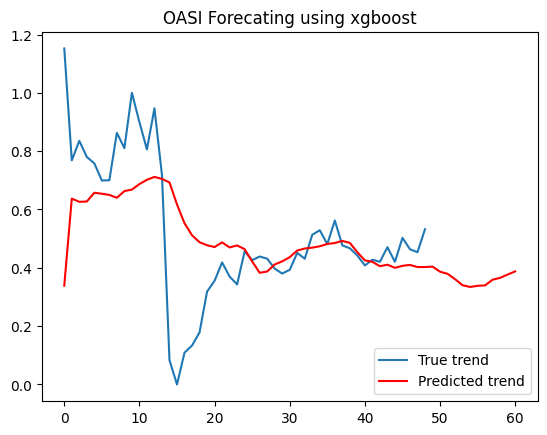

In [169]:
pyplot.plot(y, label='True trend')
pyplot.plot(yhat+future_1year, color='red', label='Predicted trend')
pyplot.legend(loc="lower right")
pyplot.title('OASI Forecating using xgboost')
pyplot.show()

In [124]:
true=pd.DataFrame(y, columns=['true_oasi'])
true['date'] =test_date
#true=true.set_index('date')

In [125]:
pred=pd.DataFrame(yhat+future_1year, columns=['pred_oasi'])
pred['date'] =pred_date
#pred=pred.set_index('date')

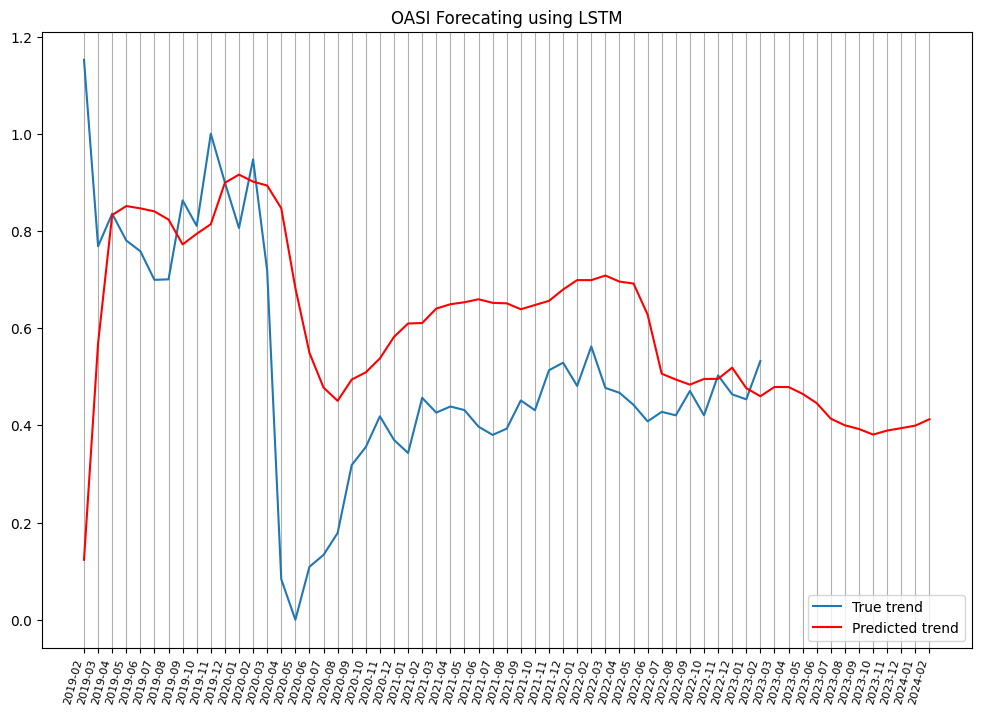

In [126]:
fig, ax = plt.subplots(figsize = (12,8))
ax.xaxis.grid()
plt.plot(true['date'], true['true_oasi'], label='True trend')
plt.plot(pred['date'], pred['pred_oasi'], color='red', label='Predicted trend')
plt.setp(ax.get_xticklabels(), rotation = 75, 
         ha = 'right', fontsize = 8, 
         color = 'black')
plt.legend(loc="lower right")
plt.title('OASI Forecating using LSTM')
plt.show()